In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

In [2]:
#xt_timeseries = ds.sla.sel(latitude=35,longitude=210, method='nearest').load()
#xp_timeseries = ds.sla.sel(latitude=55,longitude=210, method='nearest').load()
#xt_timeseries_box = ds.sla.sel(latitude=slice(32.5,37.5),longitude=slice(207.5,212.5)).mean(dim=('latitude', 'longitude')).load()
#xp_timeseries_box = ds.sla.sel(latitude=slice(52.5,57.5),longitude=slice(207.5,212.5)).mean(dim=('latitude', 'longitude')).load()

In [3]:
adir = 'F:/data/NASA_biophysical/aviso/'
xt_timeseries=xr.open_dataset(adir+'xt_ts.nc')
xp_timeseries=xr.open_dataset(adir+'xp_ts.nc')
xt_timeseries_box=xr.open_dataset(adir+'xt_ts_box.nc')
xp_timeseries_box=xr.open_dataset(adir+'xp_ts_box.nc')

xt_month_ave = xt_timeseries.resample(time='1M').mean('time')
xp_month_ave = xp_timeseries.resample(time='1M').mean('time')
xt_month_box_ave = xt_timeseries_box.resample(time='1M').mean('time')
xp_month_box_ave = xp_timeseries_box.resample(time='1M').mean('time')


C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


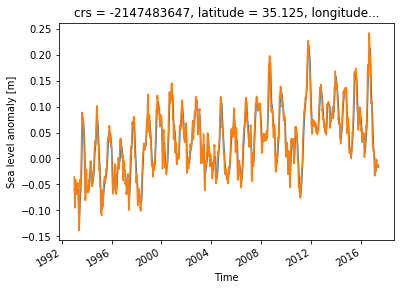

In [4]:
xt_month_ave.sla.plot()
xt_timeseries.sla.plot()

## need to .groupby month & subtract to create anomaly then 3 month boxcar

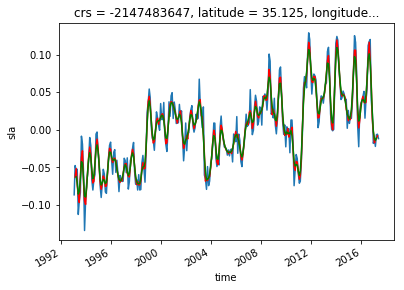

In [5]:
#monthly
N=3
climatology = xt_month_ave.sla.groupby('time.month').mean('time')
xt_anomalies = xt_month_ave.sla.groupby('time.month') - climatology
xt_smoothed_anom = np.convolve(xt_anomalies, np.ones((N,))/N, mode='valid')
xt_smoothed_anom2 = np.convolve(xt_smoothed_anom, np.ones((N,))/N, mode='valid')

#show that smoothed timeseries aligned with unsmoothed timeseries
xt_anomalies.plot()
plt.plot(xt_anomalies.time[1:-1],xt_smoothed_anom,'r')
plt.plot(xt_anomalies.time[2:-2],xt_smoothed_anom2,'g')
plt.savefig(adir+'st_anomaly.png', transparent=False, format='png')



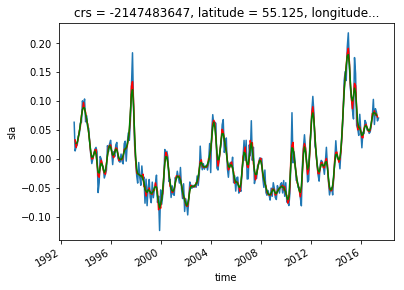

In [6]:

climatology = xp_month_ave.sla.groupby('time.month').mean('time')
xp_anomalies = xp_month_ave.sla.groupby('time.month') - climatology
xp_smoothed_anom = np.convolve(xp_anomalies, np.ones((N,))/N, mode='valid')
xp_smoothed_anom2 = np.convolve(xp_smoothed_anom, np.ones((N,))/N, mode='valid')

#show that smoothed timeseries aligned with unsmoothed timeseries
xp_anomalies.plot()
plt.plot(xp_anomalies.time[1:-1],xp_smoothed_anom,'r')
plt.plot(xp_anomalies.time[2:-2],xp_smoothed_anom2,'g')
plt.savefig(adir+'sp_anomaly.png', transparent=False, format='png')


## smoothed 5deg box
Freeland and Cummings says that they use a 25 point spatial average of a 1 deg aviso SSH dataset.  I'm guessing here, that they mean a 5degx5deg box average centered at point xt and xp

In [7]:
#monthly BOX, smooth 3 month box car twice
N=3
climatology = xt_month_box_ave.sla.groupby('time.month').mean('time')
xt_anomalies = xt_month_box_ave.sla.groupby('time.month') - climatology
xt_smoothed_box_anom = np.convolve(xt_anomalies, np.ones((N,))/N, mode='valid')
xt_smoothed_box_anom2 = np.convolve(xt_smoothed_box_anom, np.ones((N,))/N, mode='valid')
climatology = xp_month_box_ave.sla.groupby('time.month').mean('time')
xp_anomalies = xp_month_box_ave.sla.groupby('time.month') - climatology
xp_smoothed_box_anom = np.convolve(xp_anomalies, np.ones((N,))/N, mode='valid')
xp_smoothed_box_anom2 = np.convolve(xp_smoothed_box_anom, np.ones((N,))/N, mode='valid')


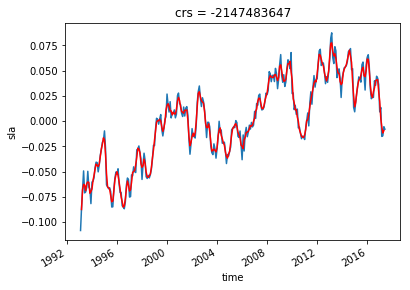

In [8]:
#show that smoothed timeseries aligned with unsmoothed timeseries
xt_anomalies.plot()
plt.plot(xt_anomalies.time[1:-1],xt_smoothed_box_anom,'r')


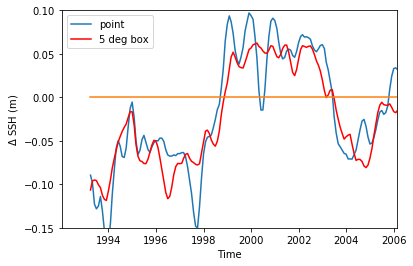

In [17]:
plt.plot(xp_anomalies.time[2:-2],xt_smoothed_anom2-xp_smoothed_anom2)
plt.plot(xp_anomalies.time[2:-2],xt_smoothed_box_anom2-xp_smoothed_box_anom2,'r')
plt.plot(xp_anomalies.time[2:-2],(xp_smoothed_anom2-xt_smoothed_anom2)*0)
xmin, xmax = plt.xlim()
plt.xlim(xmin,xmax-4500)
plt.ylim(-.15,.10)
plt.ylabel('$\Delta$ SSH (m)')
plt.xlabel('Time')
plt.legend(['point','5 deg box'])
plt.savefig(adir+'ssh_2006.png', transparent=False, format='png')


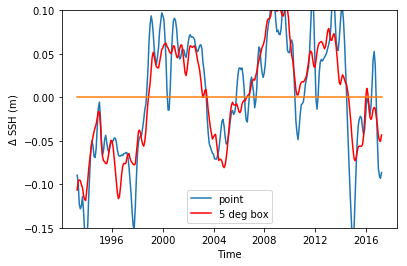

In [18]:
plt.plot(xp_anomalies.time[2:-2],xt_smoothed_anom2-xp_smoothed_anom2)
plt.plot(xp_anomalies.time[2:-2],xt_smoothed_box_anom2-xp_smoothed_box_anom2,'r')
plt.plot(xp_anomalies.time[2:-2],(xp_smoothed_anom2-xt_smoothed_anom2)*0)
plt.ylabel('$\Delta$ SSH (m)')
plt.ylim(-.15,.10)
plt.xlabel('Time')
plt.legend(['point','5 deg box'])
plt.savefig(adir+'ssh_2017.png', transparent=False, format='png')


In [11]:
xp_anomalies.time[30]

<xarray.DataArray 'time' ()>
array('1995-07-31T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    crs      int32 -2147483647
    time     datetime64[ns] 1995-07-31
    month    int64 7

var 0.0018843269876960655 = 0.0018843269876960657
percent variance
breathing: 0.18675998734030066
biforcation: 0.8132400126596994


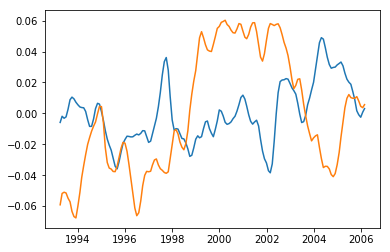

In [12]:
#T = C * [a,b]
#to 2006
#timeseries with zero mean
T1 = xt_smoothed_box_anom2[:13*12]-np.mean(xt_smoothed_box_anom2[:13*12])
T2 = xp_smoothed_box_anom2[:13*12]-np.mean(xp_smoothed_box_anom2[:13*12])
#T1 = xp_smoothed_box_anom2[:13*12]-np.mean(xp_smoothed_box_anom2[:13*12])
#T2 = xt_smoothed_box_anom2[:13*12]-np.mean(xt_smoothed_box_anom2[:13*12])

#all
#T1 = xt_smoothed_box_anom2
#T2 = xp_smoothed_box_anom2
a = (np.sqrt(2)/2)*(T1+T2)
b = (np.sqrt(2)/2)*(T1-T2)
#check that total variance is conserved
var = np.mean(T1**2)+np.mean(T2**2)
var2 = np.mean(a**2)+np.mean(b**2)
print('var',var,'=',var2)
#calculate the fraction of variance in the breathing
#and biforcation modes
R1 = np.mean(a**2) / var2 #breathing
R2 = np.mean(b**2) / var2 #biforcation
print('percent variance')
print('breathing:',R1)
print('biforcation:',R2)
plt.plot(xp_anomalies.time[2:13*12+2],a)
plt.plot(xp_anomalies.time[2:13*12+2],b)
plt.savefig(adir+'ab_2006.png', transparent=False, format='png')


var 0.003102641430480318 = 0.003102641430480318
percent variance
breathing: 0.45459975100060934
biforcation: 0.5454002489993907


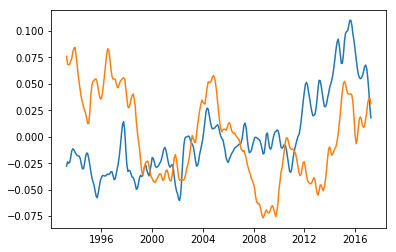

In [13]:
#T = C * [a,b]
#to 2006
#T1 = xt_smoothed_box_anom2[:13*12]
#T2 = xp_smoothed_box_anom2[13*12]
#all
T1 = xp_smoothed_box_anom2-np.mean(xp_smoothed_box_anom2)
T2 = xt_smoothed_box_anom2-np.mean(xt_smoothed_box_anom2)
a = (np.sqrt(2)/2)*(T1+T2)
b = (np.sqrt(2)/2)*(T1-T2)
#check that total variance is conserved
var = np.mean(T1**2)+np.mean(T2**2)
var2 = np.mean(a**2)+np.mean(b**2)
print('var',var,'=',var2)
#calculate the fraction of variance in the breathing
#and biforcation modes
R1 = np.mean(a**2) / var2 #breathing
R2 = np.mean(b**2) / var2 #biforcation
print('percent variance')
print('breathing:',R1)
print('biforcation:',R2)
plt.plot(xp_anomalies.time[2:-2],a)
plt.plot(xp_anomalies.time[2:-2],b)
plt.savefig(adir+'ab_2017.png', transparent=False, format='png')


In [14]:
#modal variance
r = np.mean(T1*T2)/(np.sqrt(np.mean(T1**2))*np.sqrt(np.mean(T2**2)))
print('corr coeff:',r)

corr coeff: -0.09083506949049457


In [15]:
#beta
beta = np.mean(T1**2)/np.mean(T2**2)
print('ratio of variance of SSH', beta)

ratio of variance of SSH 0.9463070446451026


In [ ]:
#streamfunction
[x,y] = meshgrid(0:20,0:15);  % This makes regular grid
[phi,psi] = flowfun(u,v);  % Here comes the potential and streamfun.


In [19]:
def flowfun(u, v=None, flag=''):
    """Calculates the potential phi and the stream function psi of a
    two-dimensional flow defined by the velocity components u and v, so
    that
    
            d(phi)   d(psi)       d(phi)   d(psi)
        u = ------ - ------;  v = ------ + ------
              dx       dy           dy       dx
    PARAMETERS
        u, v (array like) :
            Zonal and meridional velocity field vectors. 'v' can be 
            ommited if the velocity vector field U is given in complex
            form, such that U = u + i*v.
        flag (string, optional) :
            If only the stream function is needed, the '-', 'psi' or 
            'streamfunction' flag should be used. For the velocity
            potential, use '+', 'phi' or 'potential'.
            
    RETURNS
    
    EXAMPLES
        phi, psi = flowfun(u, v)
        psi = flowfun(u + i*v, '-')
    
    REFERENCES
    
    Based upon http://www-pord.ucsd.edu/~matlab/stream.htm
    
    """
    # Checks input arguments
    u = numpy.asarray(u)
    if v == None:
        v = u.imag
        u = u.real
    if u.shape != v.shape:
        raise Exception, 'Error: matrices U and V must be of equal size'
    isphi, ispsi = True, True
    if flag in ['-', 'psi', 'streamfunction']:
        isphi = False
    if flag in ['+', 'phi', 'potential']:
        ispsi = False
    
    a, b = u.shape
    
    # Now, the main computations. Integrates the velocity fields to get the
    # velocity potential and stream function using Simpson rule summation
    
    # The velocity potential (phi), non-rotating part
    if isphi:
        cx = simpson(u[0, :])     # Computes the x-integration constant
        cy = simpson(v[:, 0])     # Computes the y-integration constant
        phi = simpson(v) + cx * numpy.ones((a, 1))
        phi = (phi + simpson(u.transpose()).transpose() + 
            (cy * numpy.ones((b, 1))).transpose()) / 2
    
    # Compute streamfunction (psi), solenoidal part
    if ispsi:
        cx = simpson(v[0, :])      # Computes the x-integration constant
        cy = simpson(u[:, 0])      # Computes the y-integration constant
        psi = -simpson(u) + cx * numpy.ones((a, 1))
        psi = (psi + simpson(v.transpose()).transpose() - 
            (cy * numpy.ones((b, 1))).transpose()) / 2
    
    if isphi & ispsi:
        return (phi, psi)
    elif isphi:
        return phi
    elif ispsi:
        return psi
    else:
        return None


SyntaxError: invalid syntax (<ipython-input-19-a60fe71c215c>, line 36)